<a href="https://colab.research.google.com/github/AparnaMounikau763/OIBSIP/blob/main/Unemployment_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Load the Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

# Display the first few rows of the dataset
print(df.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-01-2020          M                              5.48   
1  Andhra Pradesh   29-02-2020          M                              5.83   
2  Andhra Pradesh   31-03-2020          M                              5.79   
3  Andhra Pradesh   30-04-2020          M                             20.51   
4  Andhra Pradesh   31-05-2020          M                             17.43   

    Estimated Employed   Estimated Labour Participation Rate (%) Region.1  \
0             16635535                                     41.02    South   
1             16545652                                     40.90    South   
2             15881197                                     39.18    South   
3             11336911                                     33.10    South   
4             12988845                                     36.46    South   

   longitude  latitude  
0    15.9129     79.74  
1    15.9129

**Explore the Dataset**

In [ ]:
# Check the structure of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Basic statistics of the dataset
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB
None
Region                                      0
 

**Data Preprocessing**

In [ ]:
# Handle missing values (if any)
df = df.dropna()  # Dropping missing values (or you can fill them)

# Convert date columns to datetime format if applicable
# df['Date'] = pd.to_datetime(df['Date'])


**Analyze the Unemployment Rate**

In [ ]:
# Group data by a relevant category (e.g., region, month)
unemployment_rate = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean()

# Display the mean unemployment rate by region
print(unemployment_rate)


Region
Andhra Pradesh       8.664000
Assam                4.856000
Bihar               19.471000
Chhattisgarh         7.819000
Delhi               18.414000
Goa                 12.167000
Gujarat              6.376000
Haryana             27.477000
Himachal Pradesh    16.065000
Jammu & Kashmir     16.477778
Jharkhand           19.539000
Karnataka            7.668000
Kerala               9.434000
Madhya Pradesh       6.854000
Maharashtra          7.979000
Meghalaya            3.866000
Odisha               6.462000
Puducherry          17.942000
Punjab              11.981000
Rajasthan           15.868000
Sikkim               9.792500
Tamil Nadu          12.187000
Telangana            6.833000
Tripura             25.055000
Uttar Pradesh        9.737000
Uttarakhand         11.156000
West Bengal         10.192000
Name:  Estimated Unemployment Rate (%), dtype: float64


**Visualize the Data**



*  1. Unemployment Rate by Region





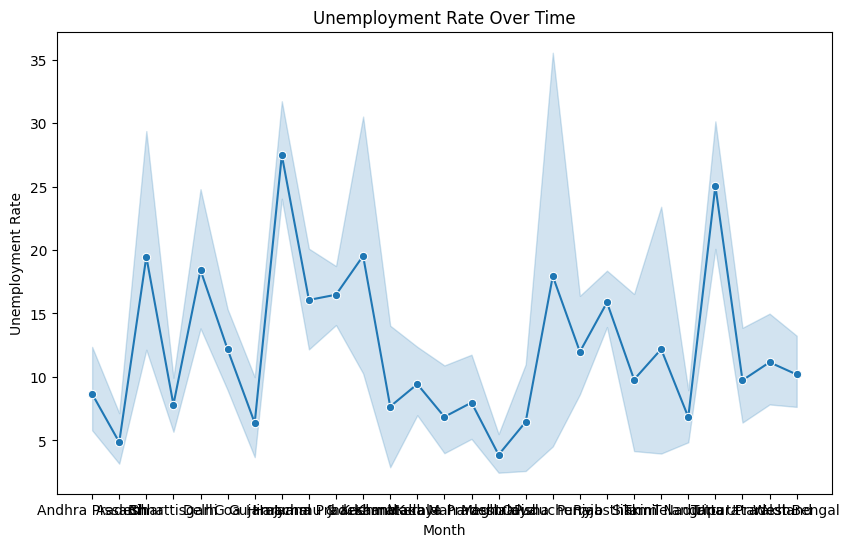

In [ ]:
# If your data has a time component, plot unemployment rate over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='Region', y=' Estimated Unemployment Rate (%)', data=df, marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate')
plt.show()




*   Unemployment Rate by Region


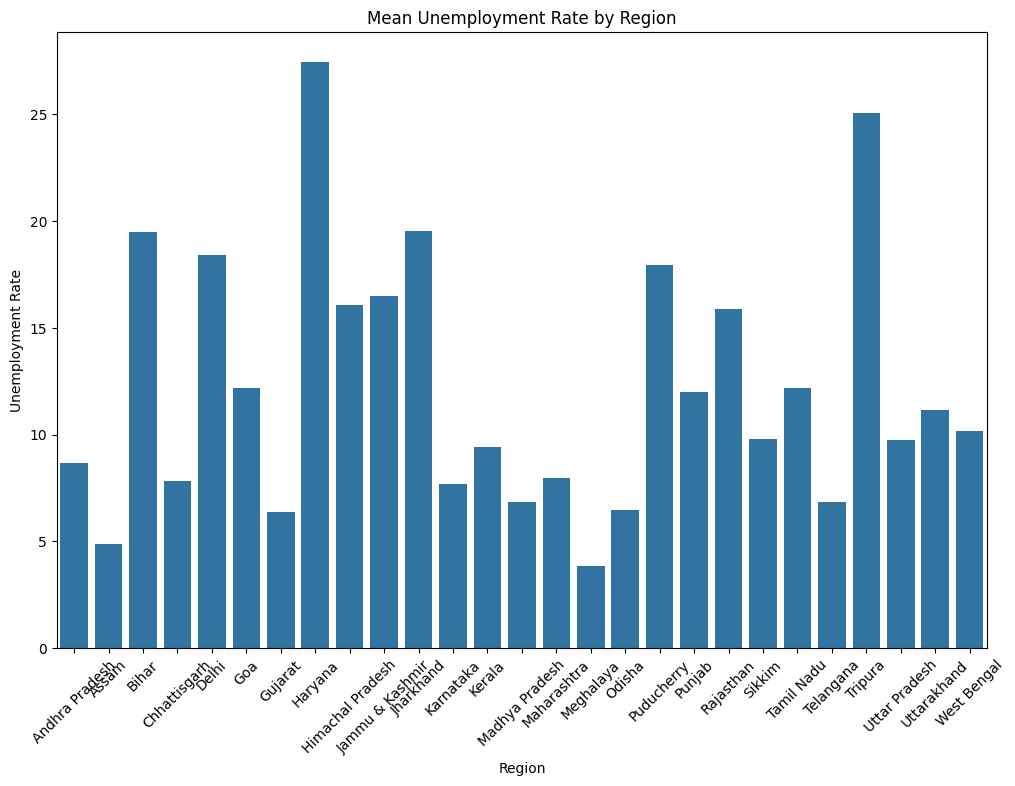

In [ ]:
# Bar plot of unemployment rate by region
plt.figure(figsize=(12, 8))
sns.barplot(x=unemployment_rate.index, y=unemployment_rate.values)
plt.title('Mean Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()




*   Heatmap for Correlation Analysis



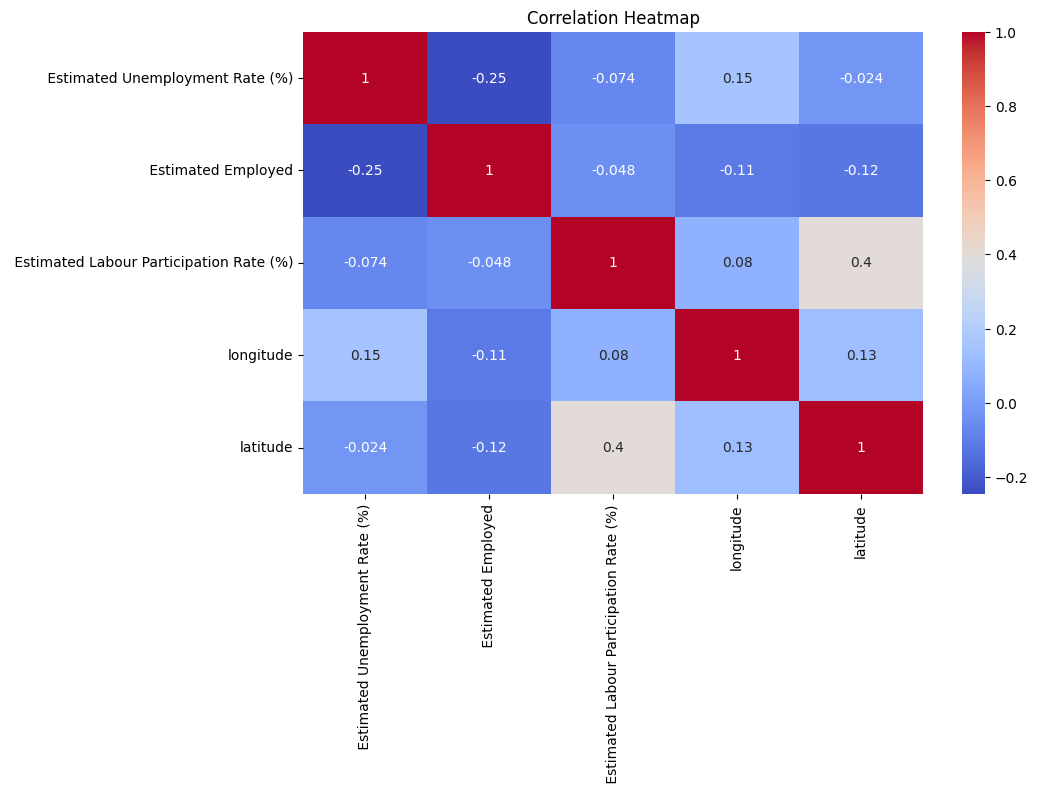

In [ ]:
# # Correlation heatmap
# plt.figure(figsize=(10, 6))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title('Correlation Heatmap')
# plt.show()
# Select only the numerical columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


**Advanced Analysis**

*   Time Series Analysis




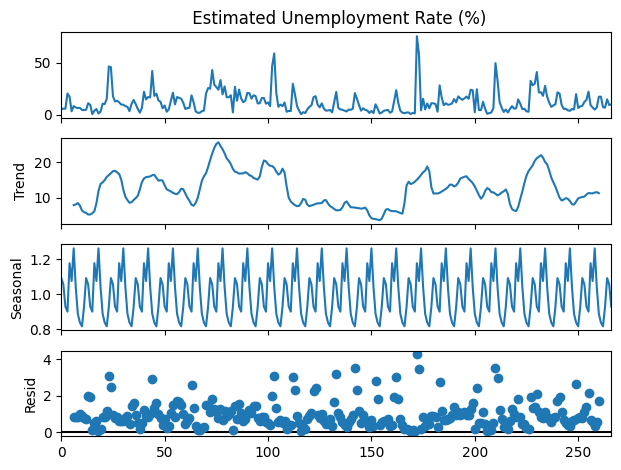

In [ ]:
# Decompose the time series (if applicable)
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df['Unemployment_Rate'] is the time series data
decomposition = seasonal_decompose(df[' Estimated Unemployment Rate (%)'], model='multiplicative', period=12)
decomposition.plot()
plt.show()


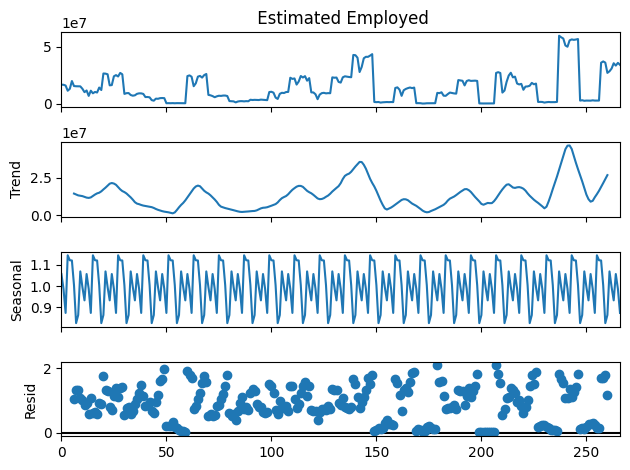

In [ ]:
# Decompose the time series (if applicable)
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming df['Unemployment_Rate'] is the time series data
decomposition1 = seasonal_decompose(df[' Estimated Employed'], model='multiplicative', period=12)
decomposition1.plot()
plt.show()



*  Predictive Modeling



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Simple linear regression to predict unemployment rates
X = df[['latitude']]  # Assuming 'Month_Index' is a numerical representation of time
y = df['longitude']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")


Mean Squared Error: 40.84240465943464
